## Project 1

#### Determine and examine factors that play a significant role in increasing the rate of heart attacks.
#### Also, use the findings to create and predict a model .

In [1]:
#import necessary library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import os 

In [2]:
#check working directory

os.getcwd()

'C:\\Users\\jeeva\\Documents\\Yamuna\\Learning\\Capstone\\Proj 1\\HeartAttack'

In [3]:
#read the dataset to Determine and examine factors that play a significant role in increasing the rate of heart attacks.

HeartAttack = pd.read_excel("data.xlsx")
HeartAttack.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 1. Preliminary analysis:

#### a. Perform preliminary data inspection and report the findings as to the structure of the data, missing values, duplicates, etc.

In [4]:
#view the dataset shape

HeartAttack.shape

(303, 14)

In [5]:
#view all the columns present in the dataset

HeartAttack.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
#view the datatype of all columns present in the dataset

HeartAttack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
#view the descriptive statistics of the dataframe
# five point summary of continuous variables 

HeartAttack.describe(include = 'all').round()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0
mean,54.0,1.0,1.0,132.0,246.0,0.0,1.0,150.0,0.0,1.0,1.0,1.0,2.0,1.0
std,9.0,0.0,1.0,18.0,52.0,0.0,1.0,23.0,0.0,1.0,1.0,1.0,1.0,0.0
min,29.0,0.0,0.0,94.0,126.0,0.0,0.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,48.0,0.0,0.0,120.0,211.0,0.0,0.0,134.0,0.0,0.0,1.0,0.0,2.0,0.0
50%,55.0,1.0,1.0,130.0,240.0,0.0,1.0,153.0,0.0,1.0,1.0,0.0,2.0,1.0
75%,61.0,1.0,2.0,140.0,274.0,0.0,1.0,166.0,1.0,2.0,2.0,1.0,3.0,1.0
max,77.0,1.0,3.0,200.0,564.0,1.0,2.0,202.0,1.0,6.0,2.0,4.0,3.0,1.0


In [8]:
#view the number of Null values in each column

print("Number of Null Values in each column")
NullValues = HeartAttack.isnull().sum(axis=0)
NullValues

Number of Null Values in each column


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
#view the number of duplicate records in the dataframe

HeartAttack.duplicated().sum()

1

In [10]:
#view the duplicate records in the dataframe

duplicate_rec = HeartAttack[HeartAttack.duplicated(keep=False)]
duplicate_rec

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [11]:
#drop the duplicate record from the dataframe

HeartAttack.drop_duplicates(inplace=True )

In [12]:
#view the number of duplicate records in the dataframe

HeartAttack.duplicated().sum()

0

In [13]:
#view the dataset shape

HeartAttack.shape

(302, 14)

#### b. Based on the findings from the previous question remove duplicates (if any) , treat missing values using an appropriate strategy.

In [14]:
## No Duplicates and No records with missing values are in the Dataset 'HeartAttack'

### 2. Prepare an informative report about the data explaining the distribution of the disease and the related factors. You could use the below approach to achieve the objective

#### a. Get a preliminary statistical summary of the data. Explore the measures of central tendencies and the spread of the data overall.

In [15]:
#view the descriptive statistics of the dataframe
# five point summary of continuous variables 

HeartAttack.describe(include = 'all').round()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.0,302.0,302.0,302.0,302.0,302.0,302.0,302.0,302.0,302.0,302.0,302.0,302.0,302.0
mean,54.0,1.0,1.0,132.0,246.0,0.0,1.0,150.0,0.0,1.0,1.0,1.0,2.0,1.0
std,9.0,0.0,1.0,18.0,52.0,0.0,1.0,23.0,0.0,1.0,1.0,1.0,1.0,0.0
min,29.0,0.0,0.0,94.0,126.0,0.0,0.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,48.0,0.0,0.0,120.0,211.0,0.0,0.0,133.0,0.0,0.0,1.0,0.0,2.0,0.0
50%,56.0,1.0,1.0,130.0,240.0,0.0,1.0,152.0,0.0,1.0,1.0,0.0,2.0,1.0
75%,61.0,1.0,2.0,140.0,275.0,0.0,1.0,166.0,1.0,2.0,2.0,1.0,3.0,1.0
max,77.0,1.0,3.0,200.0,564.0,1.0,2.0,202.0,1.0,6.0,2.0,4.0,3.0,1.0


#### View the measures of central tendencies and the spread of the data overall using distribution plot for the continuous variables

C:\Users\jeeva\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

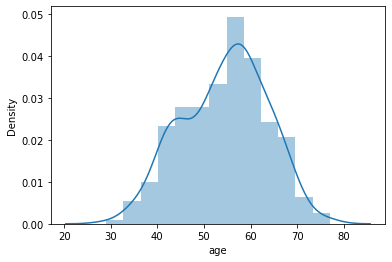

In [16]:
# View the central tendency for age

sns.distplot(HeartAttack.age)

C:\Users\jeeva\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trestbps', ylabel='Density'>

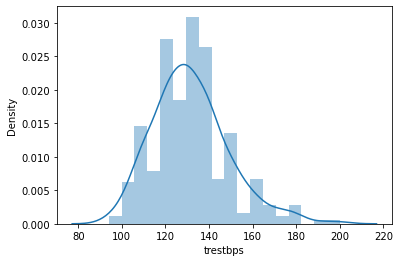

In [17]:
# View the central tendency for resting blood pressure

sns.distplot(HeartAttack.trestbps)

C:\Users\jeeva\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='chol', ylabel='Density'>

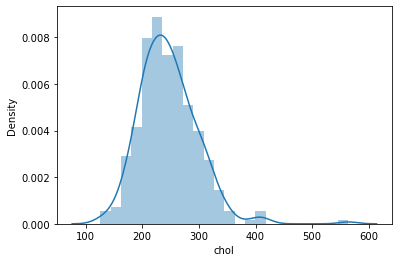

In [18]:
# View the central tendency for serum cholostrol

sns.distplot(HeartAttack.chol)

C:\Users\jeeva\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='thalach', ylabel='Density'>

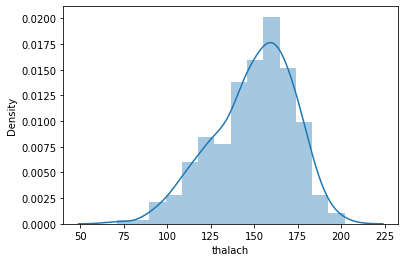

In [19]:
# View the central tendency for maximum heart rate achived

sns.distplot(HeartAttack.thalach)

C:\Users\jeeva\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='oldpeak', ylabel='Density'>

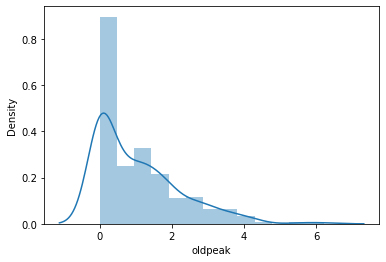

In [20]:
# View the central tendency for ST depression

sns.distplot(HeartAttack.oldpeak)

#### b. Identify the data variables which might be categorical in nature. Describe and explore these variables using appropriate tools e.g. count plot

In [21]:
# View the number of Male and Female records in the dataset 'HeartAttack'

HeartAttack.sex.value_counts()

1    206
0     96
Name: sex, dtype: int64

C:\Users\jeeva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

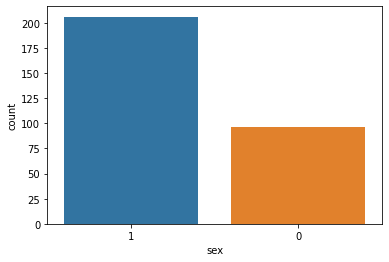

In [22]:
# View the number of Male and Female records in the dataset 'HeartAttack' using countplot

sns.countplot(HeartAttack.sex, order=HeartAttack.sex.value_counts().index)

In [23]:
# View the differnt chestpain type categories and number of records in each chestpain type in the dataset 'HeartAttack'

HeartAttack.cp.value_counts()

0    143
2     86
1     50
3     23
Name: cp, dtype: int64

C:\Users\jeeva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cp', ylabel='count'>

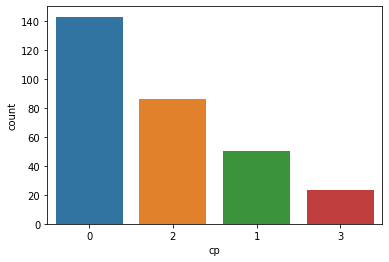

In [24]:
# View the number of chestpain type in the dataset 'HeartAttack' using countplot

sns.countplot(HeartAttack.cp, order=HeartAttack.cp.value_counts().index)

In [25]:
# View the number of records with fasting blood sugar values

HeartAttack.fbs.value_counts()

0    257
1     45
Name: fbs, dtype: int64

C:\Users\jeeva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fbs', ylabel='count'>

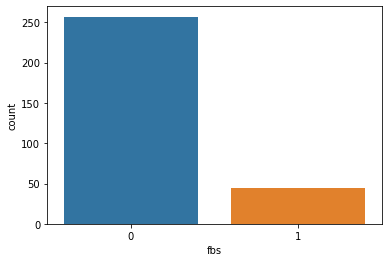

In [26]:
# View the number of records with fasting blood sugar values using coutplot in the dataset 'HeartAttack'

sns.countplot(HeartAttack.fbs, order=HeartAttack.fbs.value_counts().index)

In [27]:
# View the number of records with resting cardiographic results

HeartAttack.restecg.value_counts()

1    151
0    147
2      4
Name: restecg, dtype: int64

C:\Users\jeeva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='restecg', ylabel='count'>

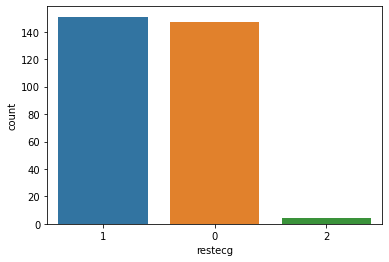

In [28]:
# View the number of records with resting cardiographic results using countplot

sns.countplot(HeartAttack.restecg, order=HeartAttack.restecg.value_counts().index)

In [29]:
# View the number of records with exercise induced angina

HeartAttack.exang.value_counts()

0    203
1     99
Name: exang, dtype: int64

C:\Users\jeeva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='exang', ylabel='count'>

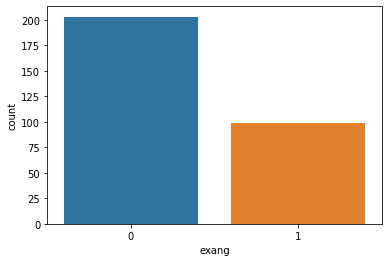

In [30]:
# View the number of records with exercise induced angina using countplot

sns.countplot(HeartAttack.exang, order=HeartAttack.exang.value_counts().index)

In [31]:
# view the number of records with peak values of ST Segment slope

HeartAttack.slope.value_counts()

2    141
1    140
0     21
Name: slope, dtype: int64

C:\Users\jeeva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='slope', ylabel='count'>

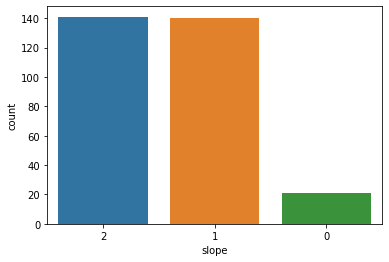

In [32]:
# view the number of records with peak values of ST Segment slope using countplot

sns.countplot(HeartAttack.slope, order=HeartAttack.slope.value_counts().index)

In [33]:
# View the number of records in each major vessels type

HeartAttack.ca.value_counts()

0    175
1     65
2     38
3     20
4      4
Name: ca, dtype: int64

C:\Users\jeeva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ca', ylabel='count'>

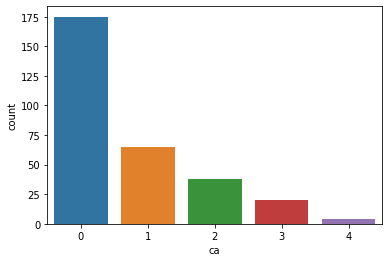

In [34]:
# View the number of records in each major vessels type using countplot

sns.countplot(HeartAttack.ca, order=HeartAttack.ca.value_counts().index)

In [35]:
# View the number of records in each defect type

HeartAttack.thal.value_counts()

2    165
3    117
1     18
0      2
Name: thal, dtype: int64

C:\Users\jeeva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='thal', ylabel='count'>

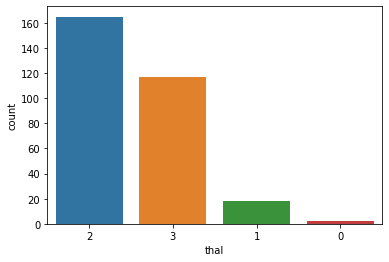

In [36]:
# View the number of records in each defect type using countplot

sns.countplot(HeartAttack.thal, order=HeartAttack.thal.value_counts().index)

#### c. Study the occurrence of CVD across Age.

In [37]:
HeartAttack.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [38]:
# View the number of records with CVD target value as 1

CVD = HeartAttack[HeartAttack.target==1]
CVD.shape

(164, 14)

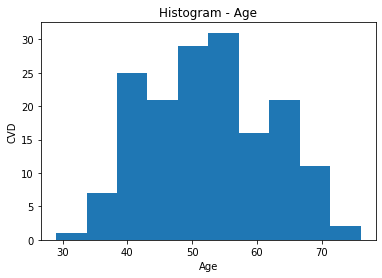

In [39]:
# View the occurance of CVD across age using Histogram 

plt.title('Histogram - Age')
plt.xlabel('Age')
plt.ylabel('CVD')
plt.hist(CVD.age)
plt.show()

C:\Users\jeeva\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

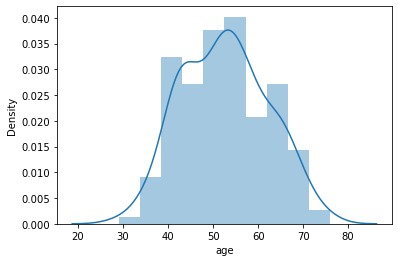

In [40]:
# View the distribution of age across CVD 
sns.distplot(CVD.age)

#### Study the composition of overall patients w.r.t. Gender.

In [41]:
# View the number of Male and Female patients

CVD.sex.value_counts()

1    92
0    72
Name: sex, dtype: int64

C:\Users\jeeva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

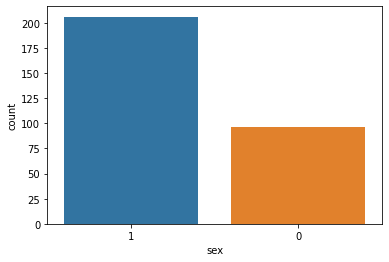

In [42]:
# View the number of Male and Female patients

sns.countplot(HeartAttack.sex, order=HeartAttack.sex.value_counts().index)

<AxesSubplot:xlabel='sex'>

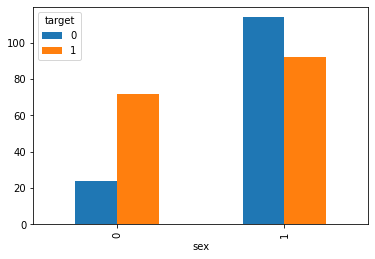

In [43]:
# View the composition of overall patients w.r.t. Gender

cvd_gender=pd.crosstab(index=HeartAttack.sex,columns=HeartAttack.target)
cvd_gender.plot.bar(stacked=False)

<AxesSubplot:xlabel='sex'>

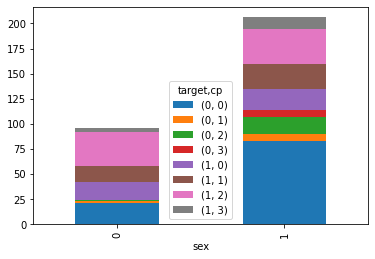

In [44]:
# View the composition of overall patients with different chest pain types w.r.t. Gender

cvd_cp_gender=pd.crosstab(index=HeartAttack.sex,columns=[HeartAttack.target, HeartAttack.cp])
cvd_cp_gender.plot.bar(stacked=True)

In [45]:
Target_group = HeartAttack.groupby('target')

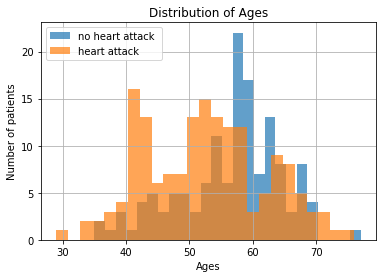

In [46]:
# View the distribution of patients across different ages

Target_group['age'].hist(bins=25, alpha=0.7)
plt.title('Distribution of Ages')
plt.xlabel('Ages')
plt.ylabel('Number of patients')
plt.legend(('no heart attack ', 'heart attack'), loc = 'upper left')
plt.show()

#### Can we detect a heart attack based on anomalies in the Resting Blood Pressure of the patient?

<AxesSubplot:xlabel='target', ylabel='trestbps'>

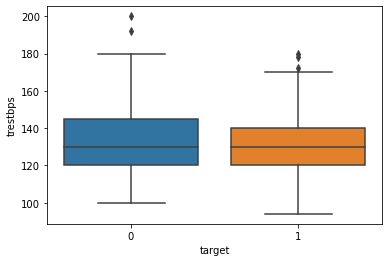

In [47]:
# View the relationship between Resting blood Pressure and CVD Patients

sns.boxplot(y=HeartAttack.trestbps,x=HeartAttack.target)

##### There is no significance occurance of cvd among varing blood pressure

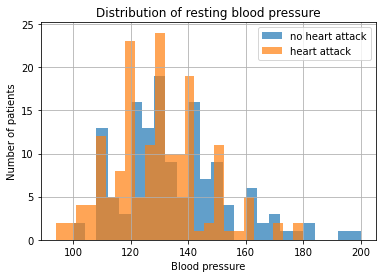

In [48]:
# View the distribution of resting blood pressure

Target_group['trestbps'].hist(bins=25, alpha=0.7)
plt.title('Distribution of resting blood pressure')
plt.xlabel('Blood pressure')
plt.ylabel('Number of patients')
plt.legend(('no heart attack', 'heart attack'), loc = 'upper right')
plt.show()

##### There are more CVD Patients with Blood pressure range 120-140 compared to higher blood pressure.


#### Describe the relationship between Cholesterol levels and our target variable.

<AxesSubplot:xlabel='target', ylabel='chol'>

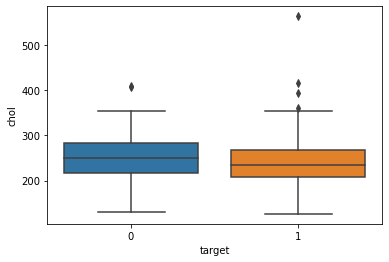

In [49]:
# View the relationship between cholesterol levels and CVD Patients

sns.boxplot(y=HeartAttack.chol,x=HeartAttack.target)

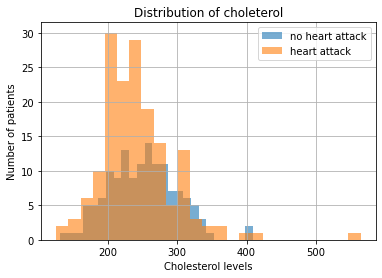

In [50]:
# View the distribution of cholestrol level

Target_group['chol'].hist(bins = 25, alpha=0.6)
plt.title('Distribution of choleterol')
plt.xlabel('Cholesterol levels')
plt.ylabel('Number of patients')
plt.legend(('no heart attack', 'heart attack'), loc = 'upper right')
plt.show()

#### What can be concluded about the relationship between peak exercising and the occurrence of a heart attack.

<AxesSubplot:xlabel='target', ylabel='slope'>

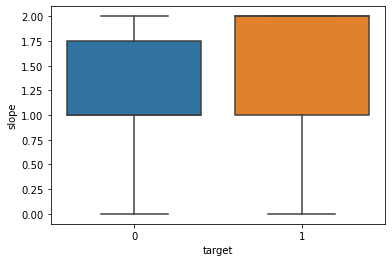

In [51]:
# View the relationship between peak exercising and CVD Patients

sns.boxplot(y=HeartAttack.slope,x=HeartAttack.target)

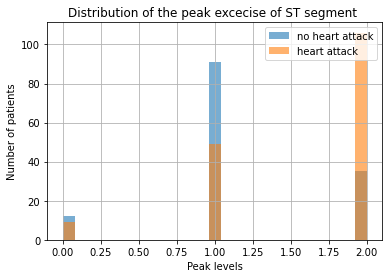

In [52]:
# View the distribution of the slope of the peak excecise ST segment

Target_group['slope'].hist(bins = 25, alpha=0.6)
plt.title('Distribution of the peak excecise of ST segment ')
plt.xlabel('Peak levels')
plt.ylabel('Number of patients')
plt.legend(('no heart attack', 'heart attack'), loc = 'upper right')
plt.show()

##### Is thalassemia a major cause of CVD?

<AxesSubplot:xlabel='target', ylabel='thal'>

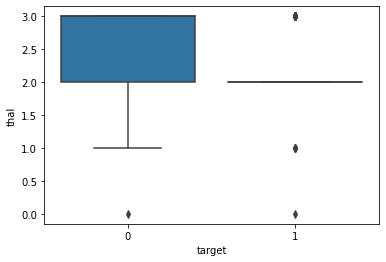

In [53]:
# View the relationship between thalassemia and CVD Patients

sns.boxplot(y=HeartAttack.thal,x=HeartAttack.target)

<AxesSubplot:xlabel='thal'>

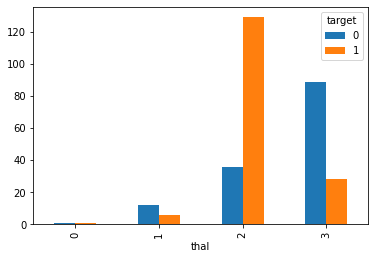

In [54]:
# View the thalasima across cvd patients

cvd_thal=pd.crosstab(index=HeartAttack.thal,columns=HeartAttack.target)
cvd_thal.plot.bar(stacked=False)

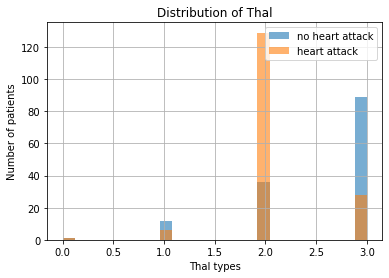

In [55]:
# View the distribution of the thal

Target_group['thal'].hist(bins = 25, alpha=0.6)
plt.title('Distribution of Thal')
plt.xlabel('Thal types')
plt.ylabel('Number of patients')
plt.legend(('no heart attack', 'heart attack'), loc = 'upper right')
plt.show()

In [56]:
#### How are the other factors determining the occurrence of CVD?

##### Use a pair plot to understand the relationship between all the given variables.

In [57]:
plt.rcParams['figure.figsize'] = (15,15)

<AxesSubplot:>

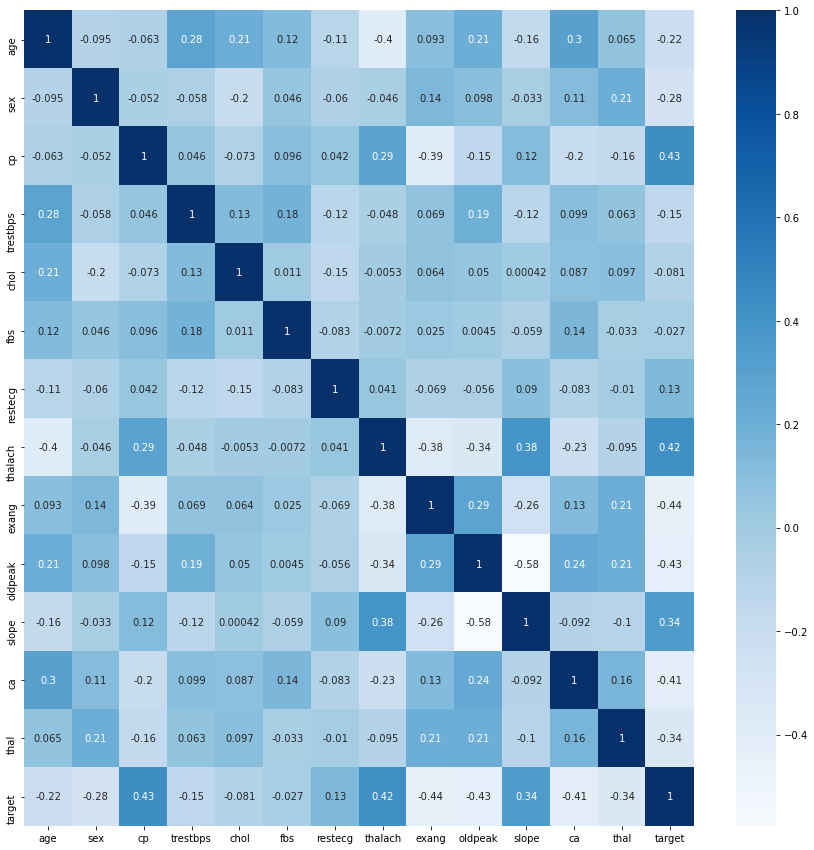

In [58]:
# View the Corelation between all the variables

colinearity_CVD=HeartAttack.corr()

sns.heatmap(colinearity_CVD, annot=True, cmap='Blues' )

In [59]:
# View the correlation between the variables

#fig, ax = plt.subplots(figsize=(15,15))
#sns.heatmap(HeartAttack.corr(),annot=True,ax=ax)

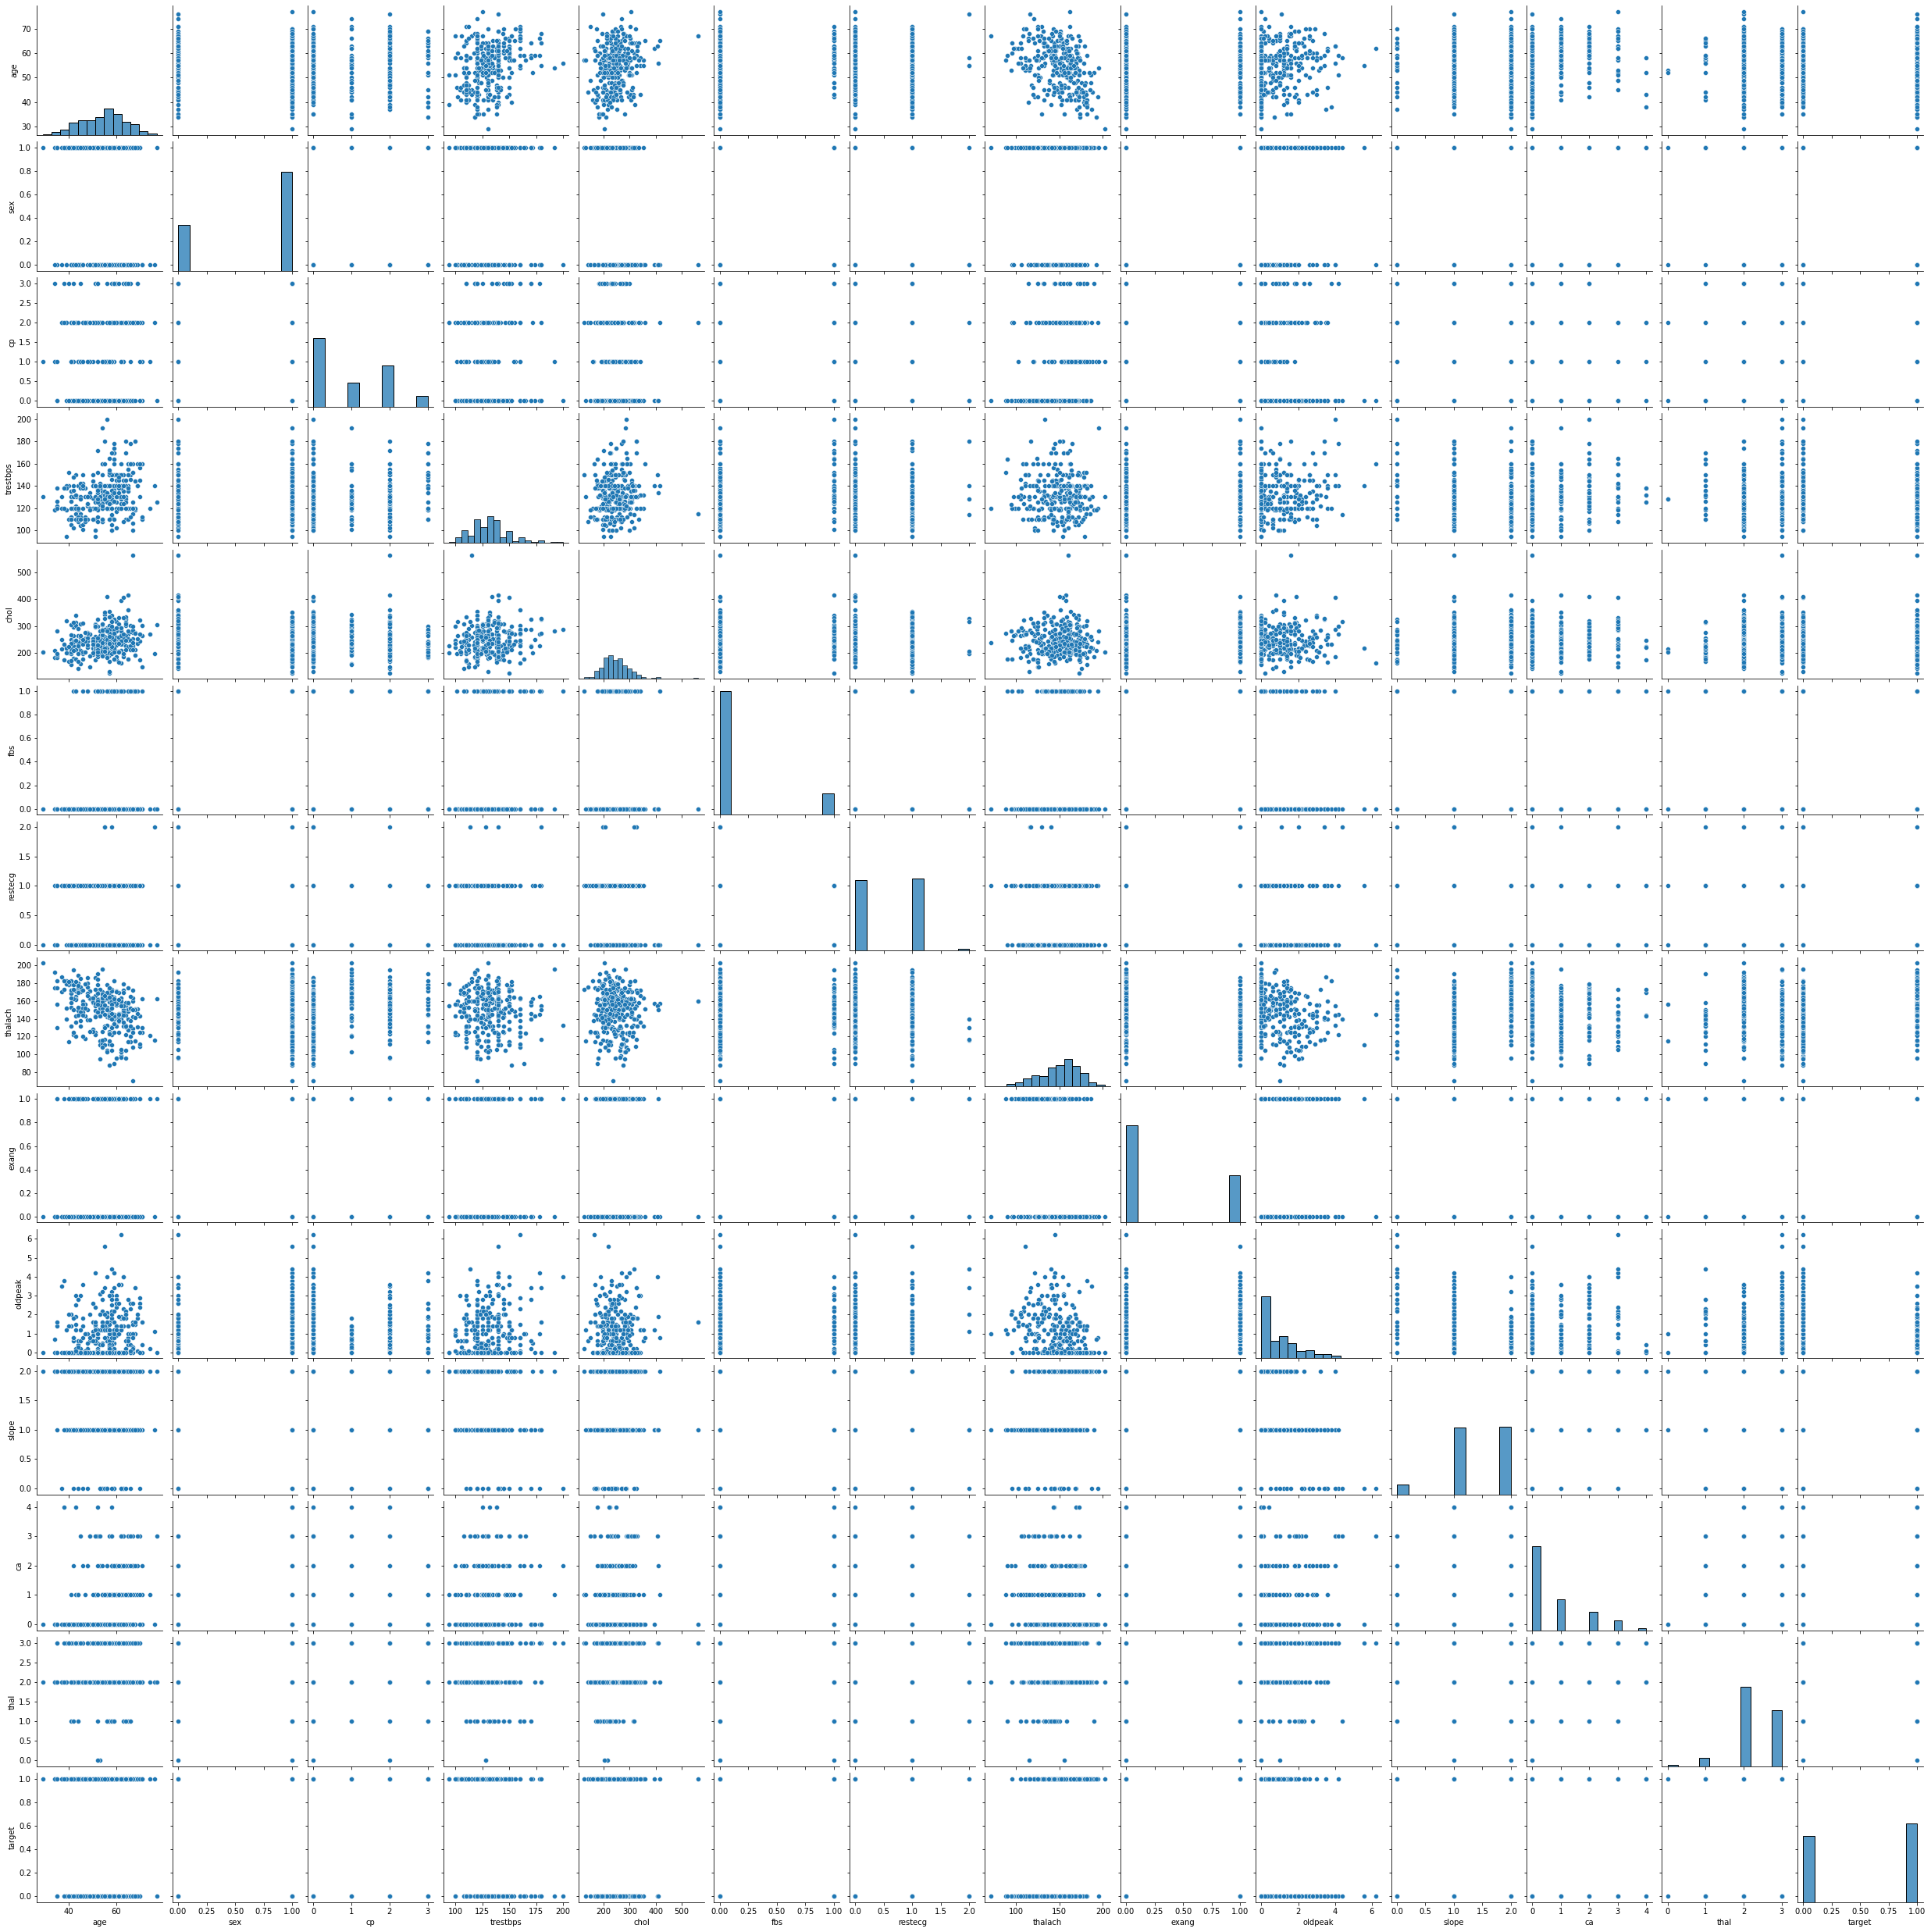

In [60]:
# View the relationship between the variables using pair plot

sns.pairplot(HeartAttack)

#### Continuous and Categorical variables

In [61]:
HeartAttack.describe(include = 'all').round()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.0,302.0,302.0,302.0,302.0,302.0,302.0,302.0,302.0,302.0,302.0,302.0,302.0,302.0
mean,54.0,1.0,1.0,132.0,246.0,0.0,1.0,150.0,0.0,1.0,1.0,1.0,2.0,1.0
std,9.0,0.0,1.0,18.0,52.0,0.0,1.0,23.0,0.0,1.0,1.0,1.0,1.0,0.0
min,29.0,0.0,0.0,94.0,126.0,0.0,0.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,48.0,0.0,0.0,120.0,211.0,0.0,0.0,133.0,0.0,0.0,1.0,0.0,2.0,0.0
50%,56.0,1.0,1.0,130.0,240.0,0.0,1.0,152.0,0.0,1.0,1.0,0.0,2.0,1.0
75%,61.0,1.0,2.0,140.0,275.0,0.0,1.0,166.0,1.0,2.0,2.0,1.0,3.0,1.0
max,77.0,1.0,3.0,200.0,564.0,1.0,2.0,202.0,1.0,6.0,2.0,4.0,3.0,1.0


In [62]:
# Convert the categorical variables into category dtype

HeartAttack.sex=pd.Categorical(HeartAttack.sex)
HeartAttack.cp= pd.Categorical(HeartAttack.cp)
HeartAttack.fbs= pd.Categorical(HeartAttack.fbs)
HeartAttack.restecg= pd.Categorical(HeartAttack.restecg)
HeartAttack.exang= pd.Categorical(HeartAttack.exang)
HeartAttack.oldpeak= pd.Categorical(HeartAttack.oldpeak)
HeartAttack.slope= pd.Categorical(HeartAttack.slope)
HeartAttack.ca= pd.Categorical(HeartAttack.ca)
HeartAttack.thal= pd.Categorical(HeartAttack.thal)
HeartAttack.target= pd.Categorical(HeartAttack.target)

In [63]:
HeartAttack.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       302 non-null    int64   
 1   sex       302 non-null    category
 2   cp        302 non-null    category
 3   trestbps  302 non-null    int64   
 4   chol      302 non-null    int64   
 5   fbs       302 non-null    category
 6   restecg   302 non-null    category
 7   thalach   302 non-null    int64   
 8   exang     302 non-null    category
 9   oldpeak   302 non-null    category
 10  slope     302 non-null    category
 11  ca        302 non-null    category
 12  thal      302 non-null    category
 13  target    302 non-null    category
dtypes: category(10), int64(4)
memory usage: 25.6 KB


#### Separate continuous and categorical variables

In [64]:
# Separate continuous variables

CDA_continuous=HeartAttack.describe().columns
CDA_continuous

Index(['age', 'trestbps', 'chol', 'thalach'], dtype='object')

In [65]:
# View the dataframe with continuous variables

HeartAttack[CDA_continuous].head()

,age,trestbps,chol,thalach
0,63,145,233,150
1,37,130,250,187
2,41,130,204,172
3,56,120,236,178
4,57,120,354,163


In [66]:
# Separate categorical variables

CDA_categorical= HeartAttack.columns.drop(CDA_continuous)
CDA_categorical

Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'oldpeak', 'slope', 'ca',
       'thal', 'target'],
      dtype='object')

In [67]:
# View the dataframe with categorical variables

HeartAttack[CDA_categorical].head()

,sex,cp,fbs,restecg,exang,oldpeak,slope,ca,thal,target
0,1,3,1,0,0,2.3,0,0,1,1
1,1,2,0,1,0,3.5,0,0,2,1
2,0,1,0,0,0,1.4,2,0,2,1
3,1,1,0,1,0,0.8,2,0,2,1
4,0,0,0,1,1,0.6,2,0,2,1


#### Outliers

In [68]:
plt.rcParams['figure.figsize'] = (7,7)

<AxesSubplot:>

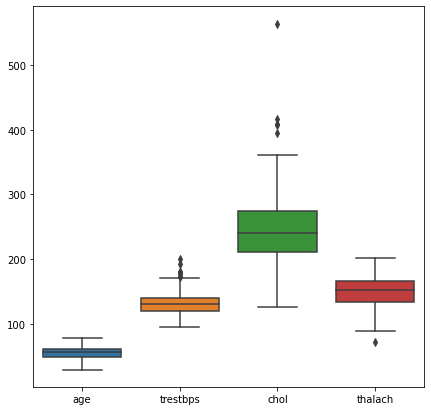

In [69]:
# View the outlier in the continuous variables

sns.boxplot(data=HeartAttack[CDA_continuous])

#### Removing Outliers by flooring and capping

In [70]:
# Flooring and Capping 
# Remove the outliers in the continuous variables 

for i in HeartAttack[CDA_continuous]: 
    q1, q3 = HeartAttack[i].quantile([0.25,0.75])
    iqr=q3-q1
    upper = q3+1.5*iqr 
    lower= q1-1.5*iqr 
    
    HeartAttack[i]=np.where(HeartAttack[i]> upper, upper , HeartAttack[i] )
    HeartAttack[i]= np.where(HeartAttack[i]<lower , lower, HeartAttack[i])
    


<AxesSubplot:>

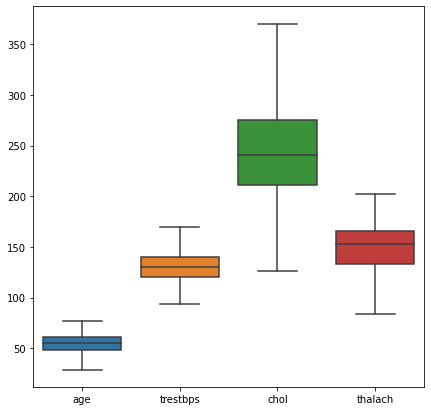

In [71]:
# View the continuous variables after flooring and capping the outliers

sns.boxplot(data=HeartAttack[CDA_continuous])

<AxesSubplot:>

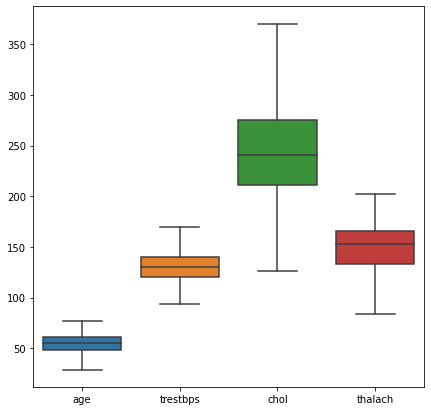

In [72]:
sns.boxplot(data=HeartAttack)

##### Model Building

In [73]:
HeartAttack.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37.0,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41.0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56.0,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57.0,0,0,120.0,354.0,0,1,163.0,1,0.6,2,0,2,1


In [74]:
HeartAttack.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       302 non-null    float64 
 1   sex       302 non-null    category
 2   cp        302 non-null    category
 3   trestbps  302 non-null    float64 
 4   chol      302 non-null    float64 
 5   fbs       302 non-null    category
 6   restecg   302 non-null    category
 7   thalach   302 non-null    float64 
 8   exang     302 non-null    category
 9   oldpeak   302 non-null    category
 10  slope     302 non-null    category
 11  ca        302 non-null    category
 12  thal      302 non-null    category
 13  target    302 non-null    category
dtypes: category(10), float64(4)
memory usage: 25.6 KB


In [75]:
# Save the dataframe to a new Excel document

HeartAttack.to_excel("HeartAttack_new.xlsx")

In [76]:
# Separate the Target varible from the dataframe 
# Separate Test and Train data

X= HeartAttack.drop('target', axis =1 )
y=HeartAttack.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [77]:
# View the number of records in the Training dataset

X_train.shape

(202, 13)

In [78]:
# View the number of records in the Testing dataset

X_test.shape

(100, 13)

#### Logistic Regression

In [79]:
lg=LogisticRegression()    

In [80]:
# Build model by fitting the training data in logistic regression

lg.fit(X_train, y_train)

C:\Users\jeeva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [81]:
# Predict the target by testing the model on the test data

pred=lg.predict(X_test)

In [82]:
# Build a confusion matrix to verify the True Positive, True Negative, False Positive, False Negative values

cnf_matrix = confusion_matrix(y_test, pred)
cnf_matrix

array([[34,  9],
       [ 9, 48]], dtype=int64)

In [83]:
# False Negative - 9, False positive - 9

#### Confusion Matrix

In [84]:
plt.rcParams['figure.figsize'] = (5,5)

Text(0.5, 320.8, 'Predicted label')

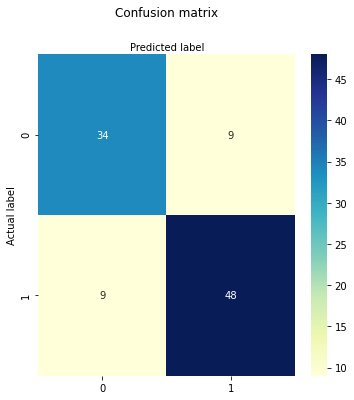

In [85]:
fig, ax = plt.subplots()
sns.heatmap(cnf_matrix, annot = True,cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [86]:
# Generate classification report

print(classification_report(y_true=y_test, y_pred=pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        43
           1       0.84      0.84      0.84        57

    accuracy                           0.82       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100



In [87]:
# Sensitivity - 0.84

In [88]:
# To improvise the model - reduce False Negative as posibile.
# Generate probability value for the test data

prob=lg.predict_proba(X_test)
prob

array([[9.86050159e-01, 1.39498415e-02],
       [6.89997108e-01, 3.10002892e-01],
       [2.23858549e-01, 7.76141451e-01],
       [9.69345705e-01, 3.06542947e-02],
       [6.05095953e-02, 9.39490405e-01],
       [3.95327785e-02, 9.60467221e-01],
       [5.39344079e-01, 4.60655921e-01],
       [9.83926608e-01, 1.60733916e-02],
       [9.95992599e-01, 4.00740121e-03],
       [6.70666294e-01, 3.29333706e-01],
       [1.76897604e-01, 8.23102396e-01],
       [8.87113064e-01, 1.12886936e-01],
       [5.96368555e-02, 9.40363145e-01],
       [9.42201867e-01, 5.77981331e-02],
       [1.24659312e-02, 9.87534069e-01],
       [4.72550837e-02, 9.52744916e-01],
       [1.66401750e-02, 9.83359825e-01],
       [9.98016473e-01, 1.98352745e-03],
       [9.98523379e-01, 1.47662149e-03],
       [9.77970198e-01, 2.20298020e-02],
       [3.52538861e-01, 6.47461139e-01],
       [9.92640855e-01, 7.35914527e-03],
       [7.88648577e-01, 2.11351423e-01],
       [3.94093350e-01, 6.05906650e-01],
       [1.606278

In [89]:
# View the probability of 1

prob=prob[:,1]

In [90]:
prob

array([1.39498415e-02, 3.10002892e-01, 7.76141451e-01, 3.06542947e-02,
       9.39490405e-01, 9.60467221e-01, 4.60655921e-01, 1.60733916e-02,
       4.00740121e-03, 3.29333706e-01, 8.23102396e-01, 1.12886936e-01,
       9.40363145e-01, 5.77981331e-02, 9.87534069e-01, 9.52744916e-01,
       9.83359825e-01, 1.98352745e-03, 1.47662149e-03, 2.20298020e-02,
       6.47461139e-01, 7.35914527e-03, 2.11351423e-01, 6.05906650e-01,
       8.39372163e-01, 5.26807317e-01, 8.88922976e-04, 7.07837515e-01,
       9.19983767e-03, 9.20869565e-01, 1.56928996e-02, 3.24485260e-02,
       5.77648703e-01, 2.02733301e-01, 7.52706329e-01, 2.13161659e-02,
       8.31065840e-01, 7.78261480e-01, 8.62855375e-01, 8.76291750e-01,
       1.28139719e-01, 8.73894424e-01, 8.79415144e-01, 7.80029071e-01,
       8.14700126e-01, 1.07225575e-02, 9.21935450e-01, 9.72220677e-01,
       5.98159485e-02, 7.15511076e-03, 2.14717985e-03, 1.91831853e-03,
       8.33599517e-01, 9.75351995e-01, 1.70658635e-02, 1.50040792e-01,
      

In [91]:
# Build a ROC curve with the predicted target values
# roc_curve function gives false positive rate fpr, true positive rate tpr, and threshold _

fpr,tpr,_=roc_curve(y_test,prob)

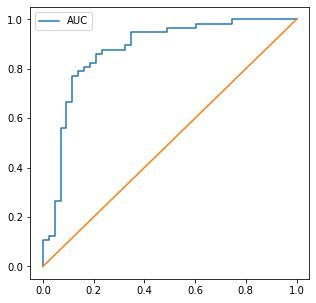

In [92]:
# View the Area Under the curve, plot using false positive rate and true positive rate

plt.plot(fpr,tpr, label='AUC')
plt.plot([0,1],[0,1])
plt.legend()

In [93]:
# Make new prediction by changing the default threshold .5 to .3 for the predicted probability values

pred_new=np.where(prob > 0.3, 1,0 )

In [94]:
# Generate a confusion matrix with the new predicted values

cnf_matrix_new = confusion_matrix(y_test, pred_new)
cnf_matrix_new

array([[32, 11],
       [ 7, 50]], dtype=int64)

In [95]:
# False Negative - 7, False Positive - 11

Text(0.5, 320.8, 'Predicted label')

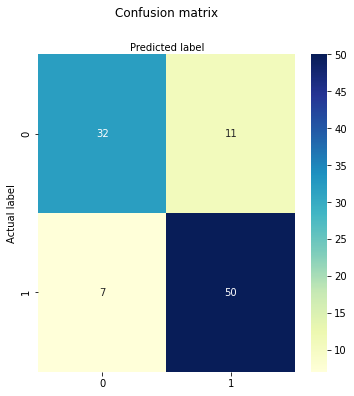

In [96]:
fig, ax = plt.subplots()
sns.heatmap(cnf_matrix_new, annot = True,cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [97]:
# Generate classification report with the new predicted values

print(classification_report(y_test, pred_new))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78        43
           1       0.82      0.88      0.85        57

    accuracy                           0.82       100
   macro avg       0.82      0.81      0.81       100
weighted avg       0.82      0.82      0.82       100



In [98]:
# Sensitivity - 0.88

In [99]:
# Find the Varibles of importance in the dataset using RFE function

m=RFE(estimator=lg,n_features_to_select=1)

In [100]:
# Fit the training dataset in the RFE model

m.fit(X_train,y_train)

C:\Users\jeeva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jeeva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

RFE(estimator=LogisticRegression(), n_features_to_select=1)

In [101]:
# View the Ranking of the features(columns/variables) in the data set

m.ranking_

array([11,  5,  6, 12, 13,  9,  7, 10,  1,  8,  4,  2,  3])

In [102]:
# View the Column names in the training dataset

X_train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [103]:
# View the Ranking and Column names

Ranking_CVD=pd.DataFrame(m.ranking_, X_train.columns)
Ranking_CVD.columns = {'Ranking'}
Ranking_CVD

,Ranking
age,11
sex,5
cp,6
trestbps,12
chol,13
fbs,9
restecg,7
thalach,10
exang,1
oldpeak,8
